## An Overfitting Example: Polynomial Curve Fitting

Degree= 1 , coefficients= [-1.35138446]
Degree= 3 , coefficients= [ 11.1331822  -32.95076452  21.98623377]
Degree= 9 , coefficients= [ 1.05037522e+02 -2.26180928e+03  2.13602586e+04 -1.07407073e+05
  3.12668028e+05 -5.43220993e+05  5.54458361e+05 -3.06230591e+05
  7.05288240e+04]


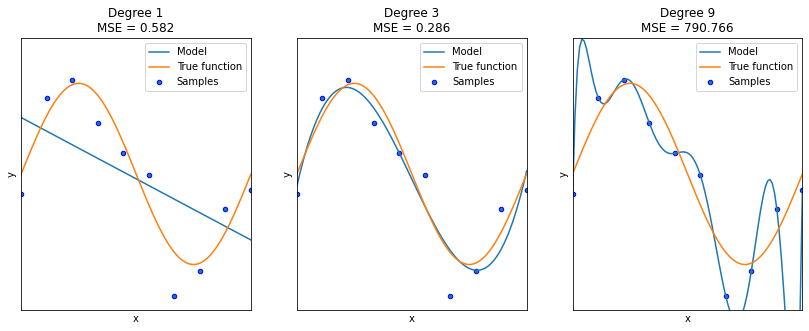

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.sin(2 * np.pi * X)

np.random.seed(123)

n_samples = 10
degrees = [1, 3, 9]

X = np.linspace(0, 1, n_samples) # np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2 # 0.2값을 수정해도 바뀜 -> 해볼 것

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y) # np.newaxis는 새로운 축을 만들어주기 때문에 해당 경우는 column vector로 만들어주는 역할
    print("Degree=", degrees[i], ", coefficients=", pipeline.steps[1][1].coef_)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.3f}".format(degrees[i], -scores.mean()))

plt.show()

- 샘플을 100개로 수정

Degree= 1 , coefficients= [-1.84708425]
Degree= 3 , coefficients= [ 11.90971681 -34.20015919  22.63912965]
Degree= 9 , coefficients= [-3.26003299e+00  2.01647785e+02 -1.50412727e+03  4.86228712e+03
 -7.76394234e+03  4.97429768e+03  1.48746327e+03 -3.52267969e+03
  1.26822276e+03]


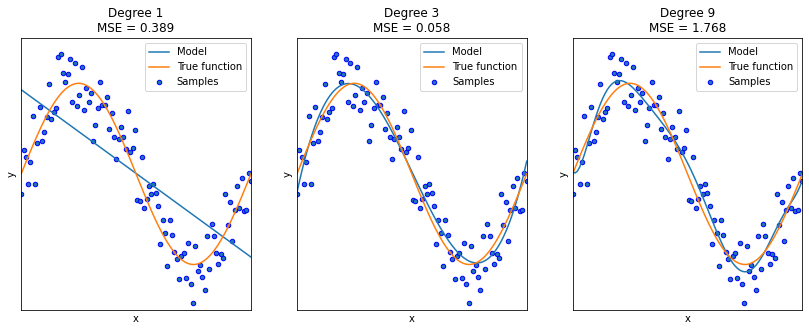

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.sin(2 * np.pi * X)

np.random.seed(123)

n_samples = 100    ######## 이 부분 수정 #########
degrees = [1, 3, 9]

X = np.linspace(0, 1, n_samples) # np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print("Degree=", degrees[i], ", coefficients=", pipeline.steps[1][1].coef_)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.3f}".format(degrees[i], -scores.mean()))

plt.show()

- sin을 편차를 5로 수정 -> 완만한 sin 그래프보다 더 랜덤해짐

Degree= 1 , coefficients= [-0.00262282]
Degree= 3 , coefficients= [-0.94848416  0.09904064  0.90971455]
Degree= 9 , coefficients= [ 6.25697712e+01 -1.04349125e+03  9.74282986e+03 -5.75145464e+04
  2.01407193e+05 -4.09028067e+05  4.71364515e+05 -2.85554790e+05
  7.05638310e+04]


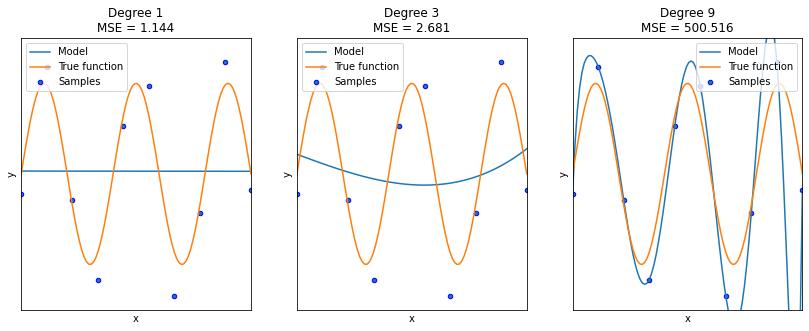

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.sin(5 * np.pi * X) ######## 이 부분 수정 #########

np.random.seed(123)

n_samples = 10
degrees = [1, 3, 9]

X = np.linspace(0, 1, n_samples) # np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print("Degree=", degrees[i], ", coefficients=", pipeline.steps[1][1].coef_)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.3f}".format(degrees[i], -scores.mean()))

plt.show()

- sin의 편차를 5로 수정 & 샘플을 100개로 수정

Degree= 1 , coefficients= [0.00561353]
Degree= 3 , coefficients= [-3.31414621  3.54348351 -0.2477534 ]
Degree= 9 , coefficients= [-1.81086472e+01  8.47839349e+02 -8.84665245e+03  3.87894086e+04
 -8.60154369e+04  1.00807536e+05 -5.81628470e+04  1.12969102e+04
  1.30126020e+03]


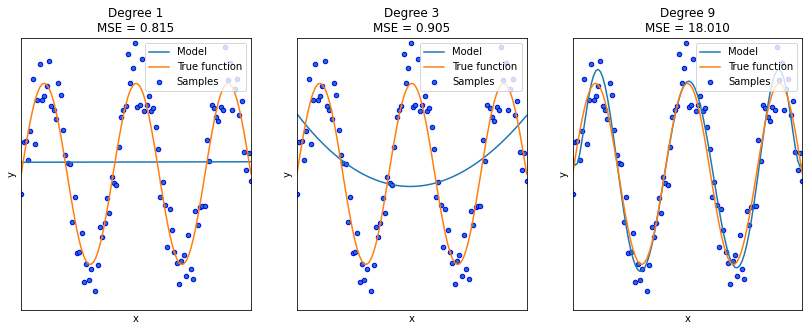

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.sin(5 * np.pi * X)    ######## 이 부분 수정 #########

np.random.seed(123)

n_samples = 100     ######## 이 부분 수정 #########
degrees = [1, 3, 9]

X = np.linspace(0, 1, n_samples) # np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print("Degree=", degrees[i], ", coefficients=", pipeline.steps[1][1].coef_)
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.3f}".format(degrees[i], -scores.mean()))

plt.show()

## End